In [1]:
import tweepy
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
consumer_key = "Ed4RNulN1lp7AbOooHa9STCoU"
consumer_secret = "P7cUJlmJZq0VaCY0Jg7COliwQqzK0qYEyUF9Y0idx4ujb3ZlW5"
access_token = "839621358724198402-dzdOsx2WWHrSuBwyNUiqSEnTivHozAZ"
access_token_secret = "dCZ80uNRbFDjxdU2EckmNiSckdoATach6Q8zb7YYYE5ER"

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [4]:
target_accounts = ("@BBCNews","@CBSNews","@CNN","@FoxNews","NYT")
sentiments_df = pd.DataFrame()

In [5]:
for target in target_accounts:
    converted_timestamps = []
    tweet_text = []
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    for tweet in tweepy.Cursor(api.user_timeline, id=target).items(100):
        converted_time = datetime.strptime(str(tweet.created_at), "%Y-%m-%d %H:%M:%S")
        converted_timestamps.append(converted_time)

        tweet_text.append(tweet.text)

        compound = analyzer.polarity_scores(tweet.text)["compound"]
        pos = analyzer.polarity_scores(tweet.text)["pos"]
        neu = analyzer.polarity_scores(tweet.text)["neu"]
        neg = analyzer.polarity_scores(tweet.text)["neg"]
            
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)



    sentiments_df[target[1:] + 'Times Stamp'] = converted_timestamps
    sentiments_df[target[1:] + 'Tweet Text'] = tweet_text
    sentiments_df[target[1:] + 'Compound'] = compound_list
    sentiments_df[target[1:] + 'Positive'] = positive_list
    sentiments_df[target[1:] + 'Negative'] = negative_list
    sentiments_df[target[1:] + 'Neutral'] = neutral_list

sentiments_df

,BBCNewsTimes Stamp,BBCNewsTweet Text,BBCNewsCompound,BBCNewsPositive,BBCNewsNegative,BBCNewsNeutral,CBSNewsTimes Stamp,CBSNewsTweet Text,CBSNewsCompound,CBSNewsPositive,...,FoxNewsCompound,FoxNewsPositive,FoxNewsNegative,FoxNewsNeutral,YTTimes Stamp,YTTweet Text,YTCompound,YTPositive,YTNegative,YTNeutral
0,2018-01-15 19:31:52,RT @BBCBusiness: What does the #Carillion coll...,-0.4939,0.000,0.198,0.802,2018-01-15 19:37:30,"U.S. moves ships, bombers toward Korea ahead o...",0.0000,0.000,...,0.3818,0.133,0.000,0.867,2018-01-15 19:33:47,Critic’s Notebook: What a Hologram of Maria Ca...,0.0000,0.000,0.000,1.000
1,2018-01-15 19:29:39,RT @BBCNewsbeat: Cyrille Regis was an inspirat...,0.5267,0.175,0.000,0.825,2018-01-15 18:55:38,Hundreds of South Florida Haitians are protest...,-0.4215,0.000,...,0.8173,0.306,0.000,0.694,2018-01-15 19:32:47,‘The Greatest Showman’ Soundtrack Repeats at N...,0.4588,0.313,0.164,0.522
2,2018-01-15 18:53:57,Rape case collapses after 'cuddling' photos em...,-0.7845,0.000,0.535,0.465,2018-01-15 18:40:33,"Dolores O'Riordan, singer of The Cranberries, ...",-0.8020,0.000,...,0.1779,0.190,0.125,0.684,2018-01-15 19:16:47,"Asia and Australia Edition: Jakarta, North Kor...",0.0000,0.000,0.000,1.000
3,2018-01-15 18:11:51,Carillion collapse: Ministers hold emergency m...,-0.7003,0.000,0.537,0.463,2018-01-15 18:25:45,Take a road trip on this U.S. Civil Rights Tra...,0.0000,0.000,...,0.3810,0.175,0.000,0.825,2018-01-15 19:02:47,Study Finds Increasing Diversity on Broadway. ...,0.0000,0.000,0.000,1.000
4,2018-01-15 18:11:51,Westminster attacker 'took steroids' before te...,-0.7964,0.000,0.542,0.458,2018-01-15 18:10:00,What Facebook's news feed change means for use...,0.0000,0.000,...,-0.8271,0.000,0.312,0.688,2018-01-15 18:47:47,"Challenging the Afghan State, a Cornered Stron...",0.0516,0.266,0.169,0.565
5,2018-01-15 17:43:32,Steven Seagal denies Bond girl assault https:/...,-0.7650,0.000,0.569,0.431,2018-01-15 17:51:33,"Dolores O'Riordan, the lead singer of Irish ba...",-0.5574,0.000,...,-0.2263,0.174,0.216,0.610,2018-01-15 18:46:47,On Baseball: What Is Baseball’s Equivalent to ...,0.0000,0.000,0.000,1.000
6,2018-01-15 17:22:12,Barry Bennell: Ex-coach 'told me his cancer wa...,-0.6597,0.000,0.328,0.672,2018-01-15 17:40:25,"""Hate cannot drive out hate, only love can do ...",0.7429,0.326,...,-0.5423,0.000,0.189,0.811,2018-01-15 18:33:47,"Dolores O’Riordan, Lead Singer of the Cranberr...",0.0000,0.000,0.000,1.000
7,2018-01-15 17:20:09,RT @BBCBreaking: Cranberries lead singer Dolor...,-0.5574,0.000,0.159,0.841,2018-01-15 17:20:02,Turkish plane's right engine experienced a sud...,-0.4588,0.000,...,-0.6124,0.000,0.286,0.714,2018-01-15 18:32:47,Books of The Times: Catching Up With Denis Joh...,0.0000,0.000,0.000,1.000
8,2018-01-15 17:14:29,Cranberries singer Dolores O'Riordan dies http...,0.0000,0.000,0.000,1.000,2018-01-15 17:01:01,"President Trummp has tweeted that he used ""tou...",0.0000,0.000,...,0.5106,0.268,0.000,0.732,2018-01-15 18:31:47,Ms. Fendi and Ms. Prada and All Their Baggage....,0.0000,0.000,0.000,1.000
9,2018-01-15 16:59:21,RT @BBCNewsGraphics: Carillion buckled under t...,-0.3612,0.000,0.106,0.894,2018-01-15 16:42:31,"These bearded ""Merb'ys"" (aka Mermaid boys) are...",0.3182,0.155,...,0.4995,0.204,0.083,0.713,2018-01-15 18:19:47,Knife Attack at Russian School Leaves at Least...,-0.4767,0.000,0.237,0.763


In [6]:
sentiments_df.to_csv("News Mood.csv")

In [15]:
plot_df=sentiments_df[[sentiments_df.columns[2], sentiments_df.columns[8], sentiments_df.columns[14], sentiments_df.columns[20], sentiments_df.columns[26]]]
plot_df=plot_df.rename(index=str,columns={'BBCNewsCompound':'BBC',
                                         'CBSNewsCompound':'CBS',
                                         'CNNCompound':'CNN',
                                          'FoxNewsCompound':'Fox',
                                         'YTCompound':'New York Times'})
plot_df

,BBC,CBS,CNN,Fox,New York Times
0,-0.4939,0.0000,0.0000,0.3818,0.0000
1,0.5267,-0.4215,0.0000,0.8173,0.4588
2,-0.7845,-0.8020,-0.6808,0.1779,0.0000
3,-0.7003,0.0000,0.4310,0.3810,0.0000
4,-0.7964,0.0000,0.0000,-0.8271,0.0516
5,-0.7650,-0.5574,-0.4939,-0.2263,0.0000
6,-0.6597,0.7429,-0.3182,-0.5423,0.0000
7,-0.5574,-0.4588,0.4215,-0.6124,0.0000
8,0.0000,0.0000,-0.5574,0.5106,0.0000
9,-0.3612,0.3182,0.6124,0.4995,-0.4767


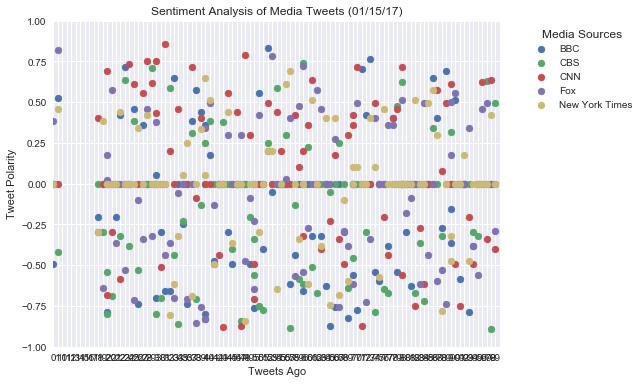

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
for column in plot_df.columns:
    ax.scatter(x=plot_df.index, y=plot_df[column], zorder=5)
    
ax.set_title('Sentiment Analysis of Media Tweets (01/15/17)')
ax.set_xlabel('Tweets Ago')
ax.set_ylabel('Tweet Polarity')
ax.set_xlim(0,100)
ax.set_ylim(-1,1)


box=ax.get_position()
ax.set_position([box.x0,box.y0,box.width,box.height])
ax.legend(bbox_to_anchor=(1.05,1),loc=2,title='Media Sources',fontsize=10)
plt.grid(True)
sns.set()

plt.show()